In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
df_0 = pd.read_csv('../Resources/Bike_weather_merge.csv')
df_0

,Date,counts_trips,counts_Bike,trip_duration,counts_member_annual,counts_member_casual,W_Temp_Max,W_Temp_Avg,W_Temp_Min,W_Max_wind,...,W_Min_wind,W_Wind_Gust,W_Air_Pressure,W_Snow_Depth,W_Max_humid,W_Avg_humid,W_Min_humid,W_Max_Dp,W_Avg_dp,W_Min_Dp
0,2019-01-01,1064,674,1121463.0,897,167.0,5.2,-1.4,-8.0,37.0,...,3.2,58.0,1015.1,0.0,100.0,85.5,64.0,6.1,-0.6,-11.1
1,2019-01-02,2290,1135,2838818.0,2207,83.0,-0.5,-4.9,-9.3,20.9,...,8.0,0.0,1023.0,0.0,100.0,84.0,74.0,0.0,-5.1,-11.1
2,2019-01-03,2279,955,1650338.0,2228,51.0,0.8,-1.0,-2.8,37.0,...,0.0,46.0,1013.3,30.0,100.0,86.0,69.0,0.0,-1.9,-5.0
3,2019-01-04,3290,1381,2269606.0,3130,160.0,8.0,3.6,-0.8,29.0,...,8.0,54.0,1007.6,30.0,87.0,80.7,70.0,2.2,0.1,-1.1
4,2019-01-05,2160,1053,1468872.0,1937,223.0,4.0,1.2,-1.7,32.2,...,3.2,33.0,1006.1,0.0,93.0,83.7,75.0,1.1,-0.1,-1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,1265,756,955753.0,873,392.0,0.1,-3.1,-6.2,59.5,...,9.7,48.0,1014.1,40.0,100.0,90.9,68.0,1.1,-2.3,-10.0
1092,2021-12-28,3054,1466,2356616.0,2025,1029.0,2.3,0.9,-0.6,40.2,...,3.2,57.0,1009.8,20.0,100.0,80.5,56.0,2.2,-1.4,-5.0
1093,2021-12-29,3521,1668,2896184.0,2440,1081.0,2.2,1.0,-0.3,32.2,...,4.8,0.0,1011.7,10.0,100.0,91.1,81.0,2.8,0.9,-1.1
1094,2021-12-30,4065,1785,2938443.0,2836,1229.0,2.2,1.1,0.0,24.1,...,4.8,0.0,1013.8,0.0,87.0,80.5,70.0,1.1,-0.4,-2.2


In [3]:
# double check if any nan values
df_0.isnull().values.any()

False

## Spliting and standardize training and testing sets


In [4]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Approach 1: y= counts_trips

In [5]:
# split features X and output y (counts_trips)
X = df_0.drop(columns=['counts_trips','Date'])
y = df_0['counts_trips']

In [6]:
print(f'X.shape: {X.shape}.')
print(f'y.shape: {y.shape}.')

X.shape: (1096, 19).
y.shape: (1096,).


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
print(f'X_train: {X_train.shape}.')
print(f'X_test: {X_test.shape}.')
print(f'y_train: {y_train.shape}.')
print(f'y_test: {y_test.shape}.')

X_train: (822, 19).
X_test: (274, 19).
y_train: (822,).
y_test: (274,).


In [9]:
scaler = StandardScaler()

In [10]:
## Date is not numeric, could not be standarized. drop it.

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [11]:
X.dtypes

counts_Bike               int64
trip_duration           float64
counts_member_annual      int64
counts_member_casual    float64
W_Temp_Max              float64
W_Temp_Avg              float64
W_Temp_Min              float64
W_Max_wind              float64
W_Avg_wind              float64
W_Min_wind              float64
W_Wind_Gust             float64
W_Air_Pressure          float64
W_Snow_Depth            float64
W_Max_humid             float64
W_Avg_humid             float64
W_Min_humid             float64
W_Max_Dp                float64
W_Avg_dp                float64
W_Min_Dp                float64
dtype: object

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
model_lr = LinearRegression()

In [15]:
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred = model_lr.predict(X_train_scaled)

In [17]:
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f'Linear Regression mean squared error: {mse}.')
print(f'Linear Regression R2 score :{r2}.')

Linear Regression mean squared error: 2.2875493674201035e-22.
Linear Regression R2 score :1.0.


In [18]:
# overall score for the model by unseen testing data
model_lr.score(X_test_scaled, y_test)

0.9990508116437439

In [ ]:
## ? LR: how to get the model function to display the features' weight?

## Random Forests

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model_rf = RandomForestRegressor(random_state=78)

In [21]:
model_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=78)

In [22]:
y_pred = model_rf.predict(X_train_scaled)

In [23]:
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f'Random Forests model mean squared error: {mse}.')
print(f'Random Forests model R2 score :{r2}.')

Random Forests model mean squared error: 32370.338569708052.
Random Forests model R2 score :0.9989721111553218.


In [24]:
features = model_rf.feature_importances_
print(features)

[5.90177755e-01 3.58809921e-01 1.56380136e-02 2.86878262e-02
 1.20506176e-03 1.06582562e-03 6.69166457e-04 3.94533907e-04
 4.22385059e-04 1.78078389e-04 4.24713083e-04 4.23978869e-04
 1.17643138e-05 2.14067986e-04 3.41503259e-04 3.29013061e-04
 3.10686332e-04 4.47199396e-04 2.48507100e-04]


In [ ]:
#model_rf.get_params()

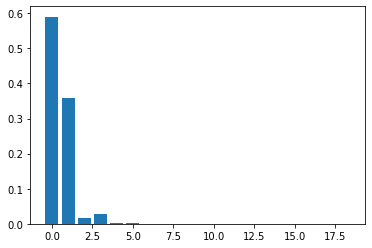

In [25]:
 %matplotlib inline
from matplotlib import pyplot as plt
plt.bar(x = range(len(features)), height=features)
plt.show()

In [26]:
 from sklearn.feature_selection import SelectFromModel
slm = SelectFromModel(model_rf)
slm.fit(X_train_scaled, y_train)
slm.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
df_0.columns

Random Forest model: y=trip counts, most weighted features are bike counts, durations,no much based on the weather conditions.   
Approach 2: y = duration, X= ave_temp, ave_wind, wind_gust, air_pressure, snow, ave_humid, avg_dp

## Approach 2

In [27]:
y2 = df_0['trip_duration']

In [28]:
X2 = df_0.drop(columns=['trip_duration','Date','counts_trips','counts_Bike','counts_member_annual','counts_member_casual', 'W_Temp_Max','W_Temp_Min', 'W_Max_wind','W_Min_wind', 'W_Max_humid','W_Min_humid', 'W_Max_Dp','W_Min_Dp'])
X2

,W_Temp_Avg,W_Avg_wind,W_Wind_Gust,W_Air_Pressure,W_Snow_Depth,W_Avg_humid,W_Avg_dp
0,-1.4,21.4,58.0,1015.1,0.0,85.5,-0.6
1,-4.9,11.9,0.0,1023.0,0.0,84.0,-5.1
2,-1.0,18.2,46.0,1013.3,30.0,86.0,-1.9
3,3.6,18.8,54.0,1007.6,30.0,80.7,0.1
4,1.2,16.3,33.0,1006.1,0.0,83.7,-0.1
...,...,...,...,...,...,...,...
1091,-3.1,38.9,48.0,1014.1,40.0,90.9,-2.3
1092,0.9,17.2,57.0,1009.8,20.0,80.5,-1.4
1093,1.0,20.8,0.0,1011.7,10.0,91.1,0.9
1094,1.1,12.6,0.0,1013.8,0.0,80.5,-0.4


In [29]:
print(f'X2.shape: {X.shape}.')
print(f'y2.shape: {y.shape}.')

X2.shape: (1096, 19).
y2.shape: (1096,).


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=78)

In [31]:
print(f'X_train: {X_train.shape}.')
print(f'X_test: {X_test.shape}.')
print(f'y_train: {y_train.shape}.')
print(f'y_test: {y_test.shape}.')

X_train: (822, 7).
X_test: (274, 7).
y_train: (822,).
y_test: (274,).


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [34]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred = model_lr.predict(X_train_scaled)

In [35]:
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
overall = model_lr.score(X_test_scaled, y_test)
print(f'Linear Regression mean squared error: {mse}.')
print(f'Linear Regression R2 score :{r2}.')
print(f'Linear Regression overall model score :{overall}.')

Linear Regression mean squared error: 19112705117582.133.
Linear Regression R2 score :0.6616061601424754.
Linear Regression overall model score :0.6097767360018245.


In [36]:
model_rf = RandomForestRegressor(random_state=78)
model_rf.fit(X_train_scaled, y_train)
y_pred = model_rf.predict(X_train_scaled)

In [37]:
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
overall_rf = model_rf.score(X_test_scaled, y_test)
print(f'Random Forests model mean squared error: {mse}.')
print(f'Random Forests model R2 score :{r2}.')
print(f'Random Forests model overall model score :{overall_rf}.')

Random Forests model mean squared error: 2810649367460.835.
Random Forests model R2 score :0.95023695358156.
Random Forests model overall model score :0.6284541501908161.


Approach 2: mse too large: variance too far away from true value. 
rf failed.

## Appraoch 3 : 
y = trip_duration:
X = avg_temp, avg_wind, avg_humid, wind_gust, avg_dp, snow, air_pressure